In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

import csa_data
import csa_constants

In [2]:
chat_data = csa_data.get_json_data(csa_constants.SENTIMENT_CHAT_DATA_FILE)

chat_df = pd.DataFrame(chat_data['messages'])
chat_df['date'] = pd.to_datetime(chat_df['date'])

chat_df = chat_df.replace(0.0, np.nan)

chat_df.head()

,text,date,sentiment
0,Sell target of doge,2021-05-01 00:57:07,NaN
1,"Anyway, is doge a good crypto for long term in...",2021-05-01 01:00:32,0.325000
2,Anyone think doge will take anymore major dips...,2021-05-01 05:07:18,0.099432
3,Has someone Supercharger on Crypto com done? T...,2021-05-01 05:42:08,0.014286
4,Please reduce transfer fees of doge,2021-05-01 13:40:50,NaN


In [3]:
grouper = pd.Grouper(key='date', freq='1D')
stats_per_day = chat_df.groupby(grouper)['sentiment'].agg(['mean', 'count']).reset_index()

stats_per_day.rename(columns={'mean': 'avg. sentiment'}, inplace=True)

stats_per_day.head()

,date,avg. sentiment,count
0,2021-05-01,0.235620,6
1,2021-05-02,-0.054074,3
2,2021-05-03,0.172222,2
3,2021-05-04,0.213773,13
4,2021-05-05,0.286111,9


# Chat Messages per Day

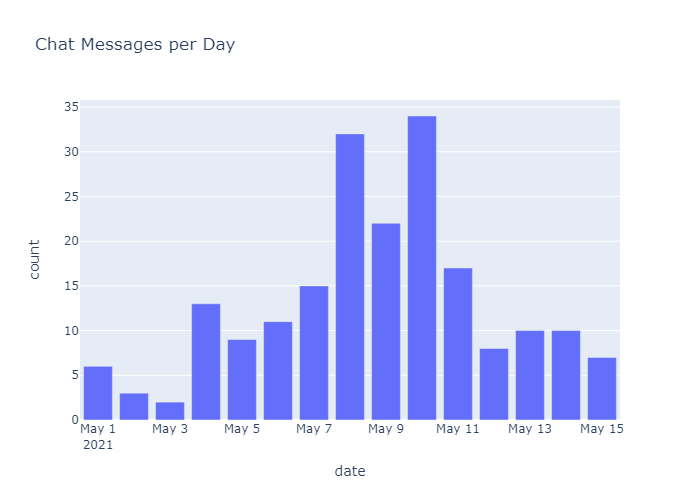

In [4]:
fig = px.bar(stats_per_day, x='date', y='count', title='Chat Messages per Day')
fig.show('png')

# Average sentiment per Day

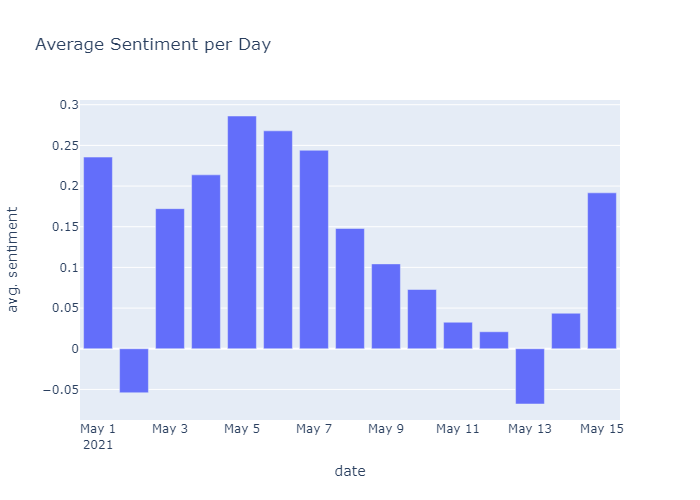

In [5]:
fig = px.bar(stats_per_day, x='date', y='avg. sentiment', title='Average Sentiment per Day')
fig.show('png')